# **Hands-on Activity 9.1 Data Visualization using Pandas and Matplotlib**

Marquez, Keith Leigh Zhen R.

# **Data Analysis and Supplementary Activity**

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
    '/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
    )
quakes = pd.read_csv('/content/earthquakes-1.csv')

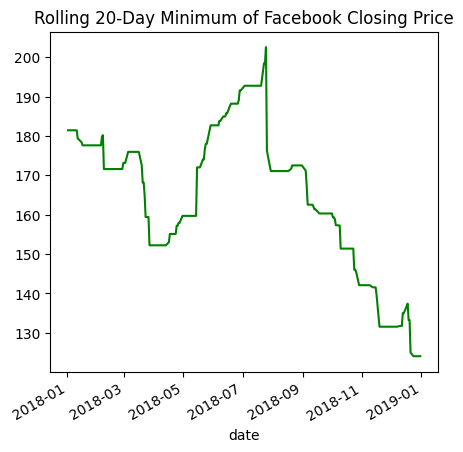

In [46]:
rolling_min = fb['close'].rolling('20D').min()

plt.figure(figsize=(5, 5))
rolling_min.plot(kind='line', style='g-', legend=False)
plt.title('Rolling 20-Day Minimum of Facebook Closing Price')
plt.show()

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

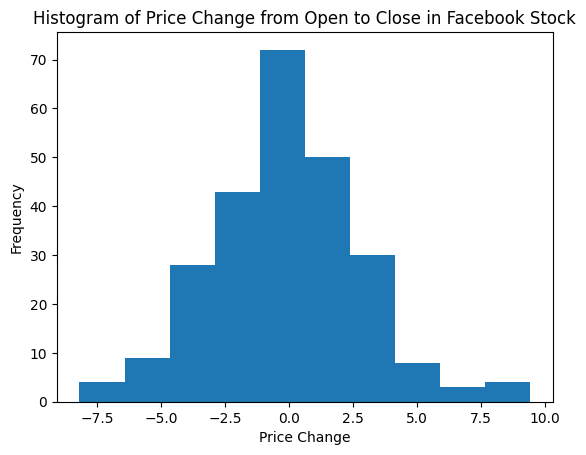

In [57]:
# Calculating the price change from open to close
fb['price_change'] = fb['open'] - fb['close']

# Plotting histogram of price change
fb['price_change'].plot(
    kind='hist',
    title='Histogram of Price Change from Open to Close in Facebook Stock'
  )
plt.xlabel('Price Change')  # Label the x-axis
plt.show()

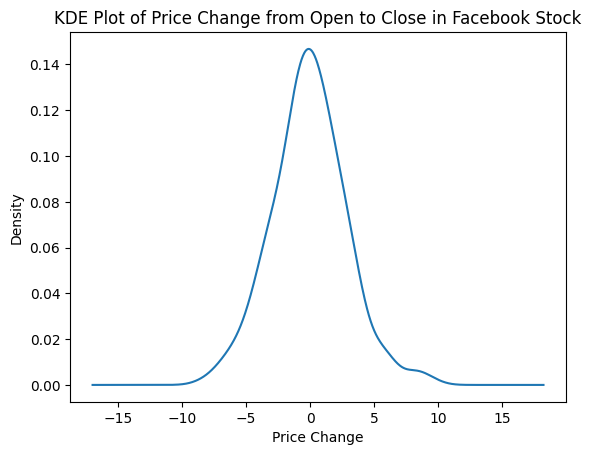

In [58]:
# Calculating the price change from open to close
fb['price_change'] = fb['open'] - fb['close']

# Plotting KDE of price change
fb['price_change'].plot(
    kind='kde',
    title='KDE Plot of Price Change from Open to Close in Facebook Stock'
    )
plt.xlabel('Price Change')  # Label the x-axis
plt.show()

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

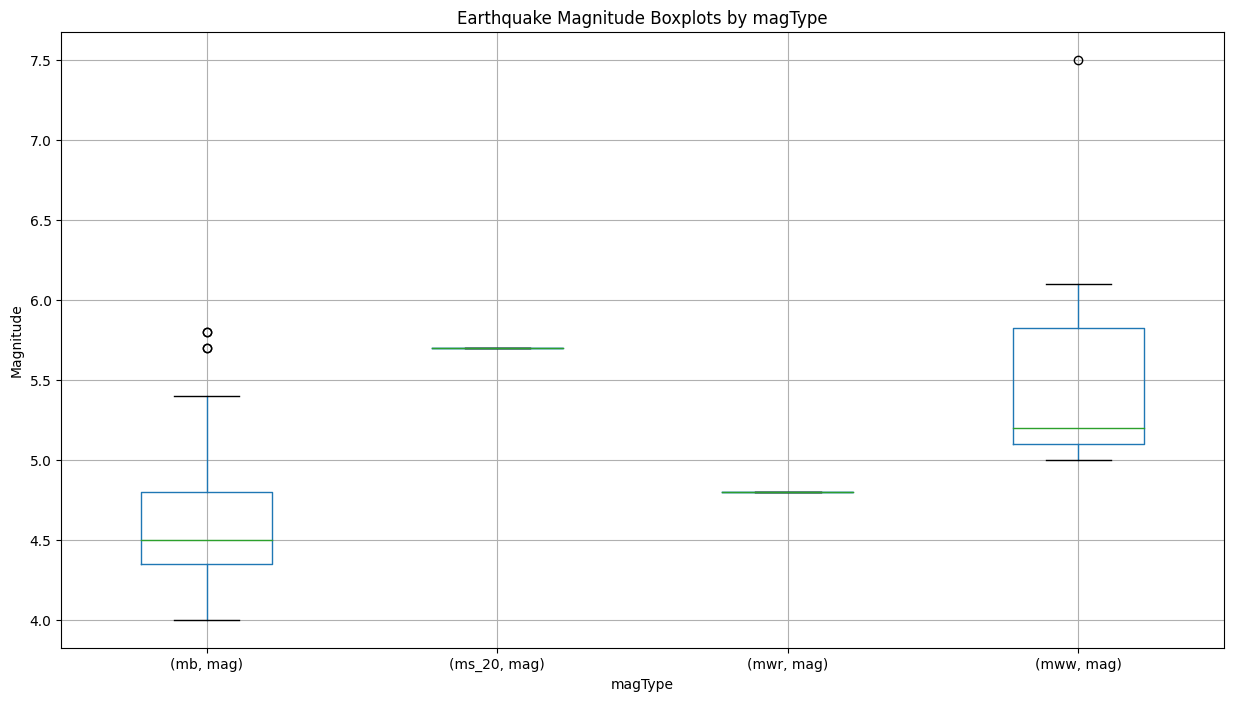

In [68]:
# Filter earthquakes data for Indonesia
indonesia_quakes = quakes[quakes['parsed_place'] == 'Indonesia']

# Create box plots for magnitudes of each magType
indonesia_quakes[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
    )
plt.title('Earthquake Magnitude Boxplots by magType')
plt.ylabel('Magnitude')  # Label the y-axis
plt.xlabel('magType')    # Label the x-axis
plt.show()

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.

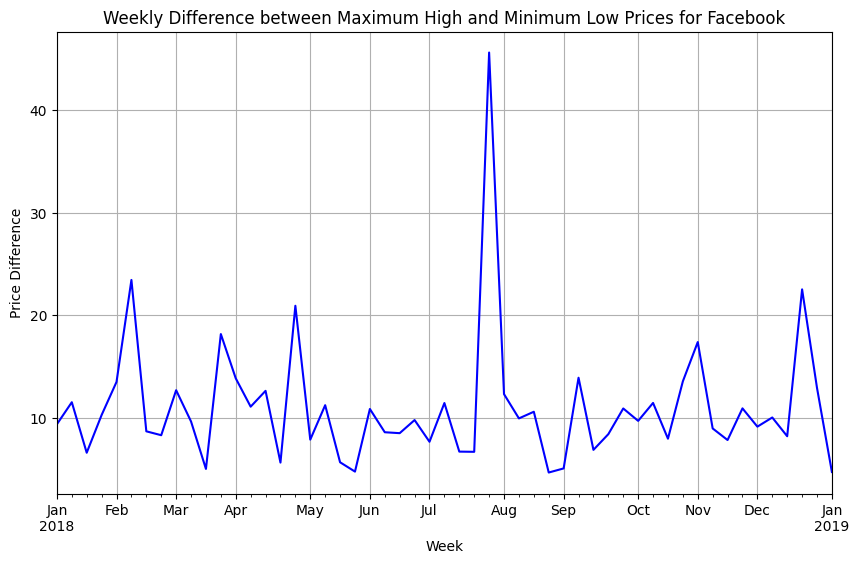

In [69]:
# Resample the data to weekly frequency and calculate the weekly maximum high price and minimum low price
weekly_high = fb['high'].resample('W').max()
weekly_low = fb['low'].resample('W').min()
weekly_diff = weekly_high - weekly_low # Calculate the weekly difference between maximum high price and minimum low price

# Plot the weekly price difference as a line plot
weekly_diff.plot(
    kind='line',
    figsize=(10, 6),
    color='blue',
    linestyle='-'
    )

# title and labels
plt.title('Weekly Difference between Maximum High and Minimum Low Prices for Facebook')
plt.xlabel('Week')
plt.ylabel('Price Difference')
plt.grid(True)
plt.show()

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

- The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

- The second subplot will be a bar plot showing the net effect this had monthly, using resample().

- Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

- Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

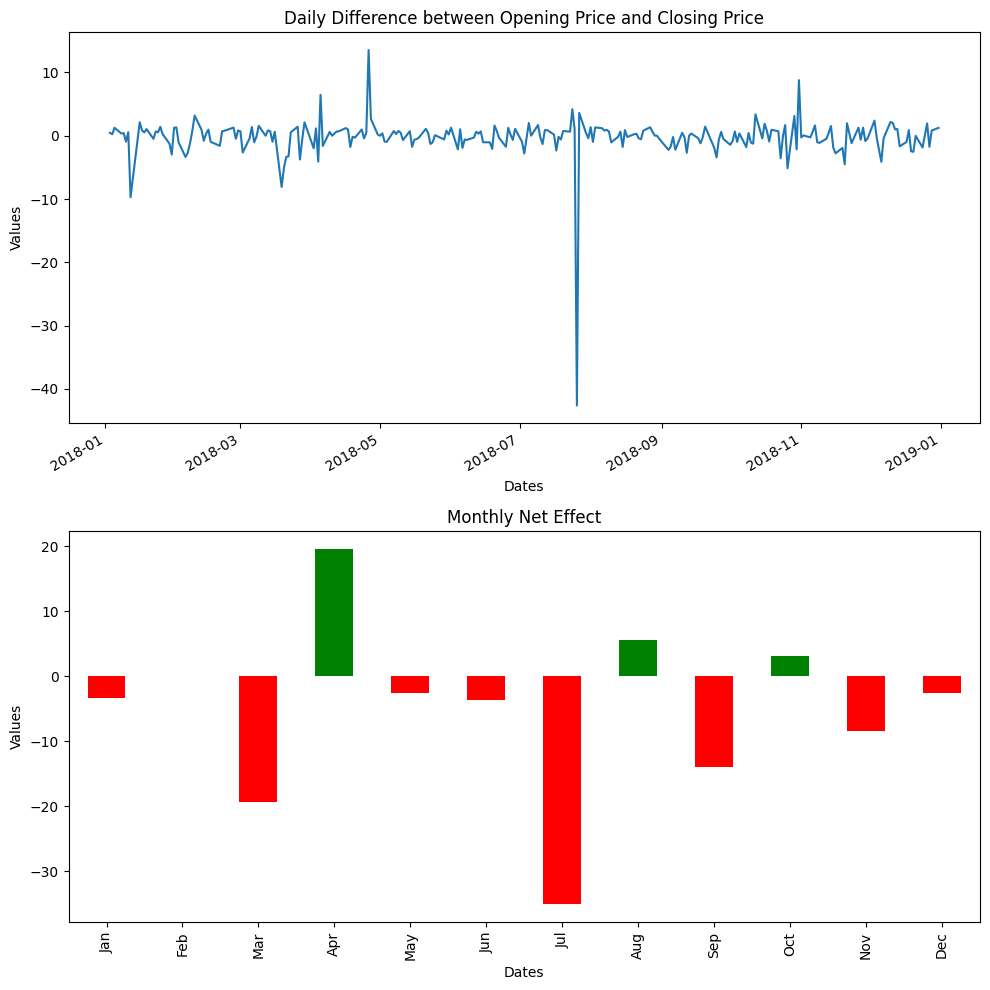

In [74]:
# Creating the subplot
fig, ax = plt.subplots(2, figsize=[10, 10])

# Calculating the daily difference between opening price and prior day's closing price
difference = fb['open'] - fb['close'].shift(1)

# Calculating the monthly net effect of after-hours trading
net_effect = difference.resample('M').sum()

# Defining colors for the bar plot based on gain or drop
colors = ['green' if value >= 0 else 'red' for value in net_effect]

# Plotting the first subplot (line plot)
difference.plot(ax=ax[0])
ax[0].set_title('Daily Difference between Opening Price and Closing Price')
ax[0].set_xlabel('Dates')
ax[0].set_ylabel('Values')

# Plotting the second subplot (bar plot)
net_effect.plot(kind='bar', ax=ax[1], color=colors)
ax[1].set_title('Monthly Net Effect')
ax[1].set_xlabel('Dates')
ax[1].set_ylabel('Values')
ax[1].set_xticklabels(net_effect.index.strftime('%b'))

# Adjusting layout
fig.tight_layout()
plt.show()

# **Summary/Conclusion:**

Provide a summary of your learnings and the conclusion for this activity.

I learned how to manipulate and visualize time series data using Pandas and Matplotlib. Through exploration, I practiced various techniques such as calculating daily differences, resampling to different frequencies, and creating plots like line plots, histograms, KDE plots, box plots, and bar plots. By applying these techniques, I gained insights into the daily and monthly trends of Facebook's stock prices. Additionally, I identified the relation of after-hours trading and visualized the distribution and changes in stock prices over time. This hands-on activity not only enhanced my understanding of data analysis but also equipped me with valuable skills to extract meaningful insights from real-world datasets.